In [6]:
from qiskit import *
from qiskit.circuit import ParameterVector, QuantumCircuit

In [13]:
# Define general tsp entangler function for nodes = N

def tsp_entangler(N):
    
    # Define QuantumCircuit and ParameterVector size
    circuit = QuantumCircuit(N**2)
    theta =  ParameterVector('theta',length=(N-1)*N)
    
    # x gates
    for i in range(N):
        circuit.x(i*N)
        
        # ry-cz-ry gates
        for j in range(N-1):
            circuit.ry(theta[(N-1)*i+j],i*N+j+1)
            circuit.cz(i*N+j,i*N+j+1)
            circuit.ry(-theta[(N-1)*i+j],i*N+j+1)
            
        # cx gates
        for k in range(N-1):
            circuit.cx(i*N+k+1,i*N+k)

    return circuit

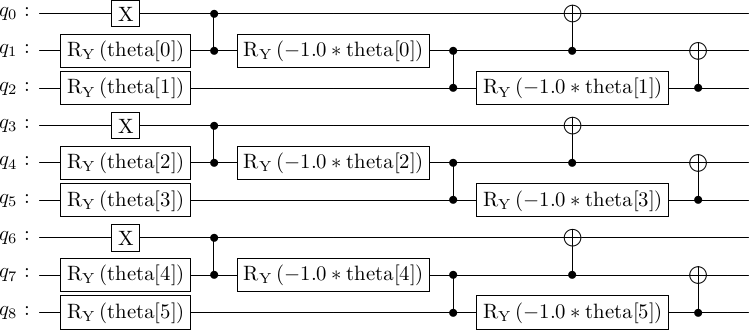

In [15]:
qc = tsp_entangler(3) # change depending on how many nodes you need

qc.draw('latex')